## Exercise2: Polynomial regression

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
data = np.loadtxt('housing_price_index.csv' ,delimiter=',')

data = data.astype(np.int64)

In [4]:
#X = np.arange(1975,2018,1)
X = data[:,0]
#X = X.astype(np.int64)
y=data[:,1]

## Exe2.Question1: Plot the data

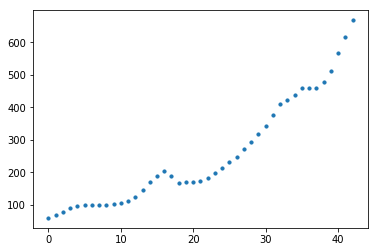

In [5]:
plt.scatter(X, y, s=10)
plt.show()

In [6]:
def fitting(X,y,degree):
    X = X.reshape(-1,1)
        
    Xe = np.c_[np.ones((X.shape[0],1)),X]
    if degree>=2:
        for i in range(2,degree+1):
            Xe = np.c_[Xe,X**i]
            #Xe = np.c_[Xe,np.power(X, i, dtype=np.int_)]
    #print(Xe)
    beta = np.linalg.inv(Xe.T.dot(Xe)).dot(Xe.T).dot(y)
    pred_y = np.dot(Xe,beta)
    
    error = pred_y - y
    cost = 1/(X.shape[0]) * np.dot(error.T, error)
    
    return beta,pred_y,cost


    

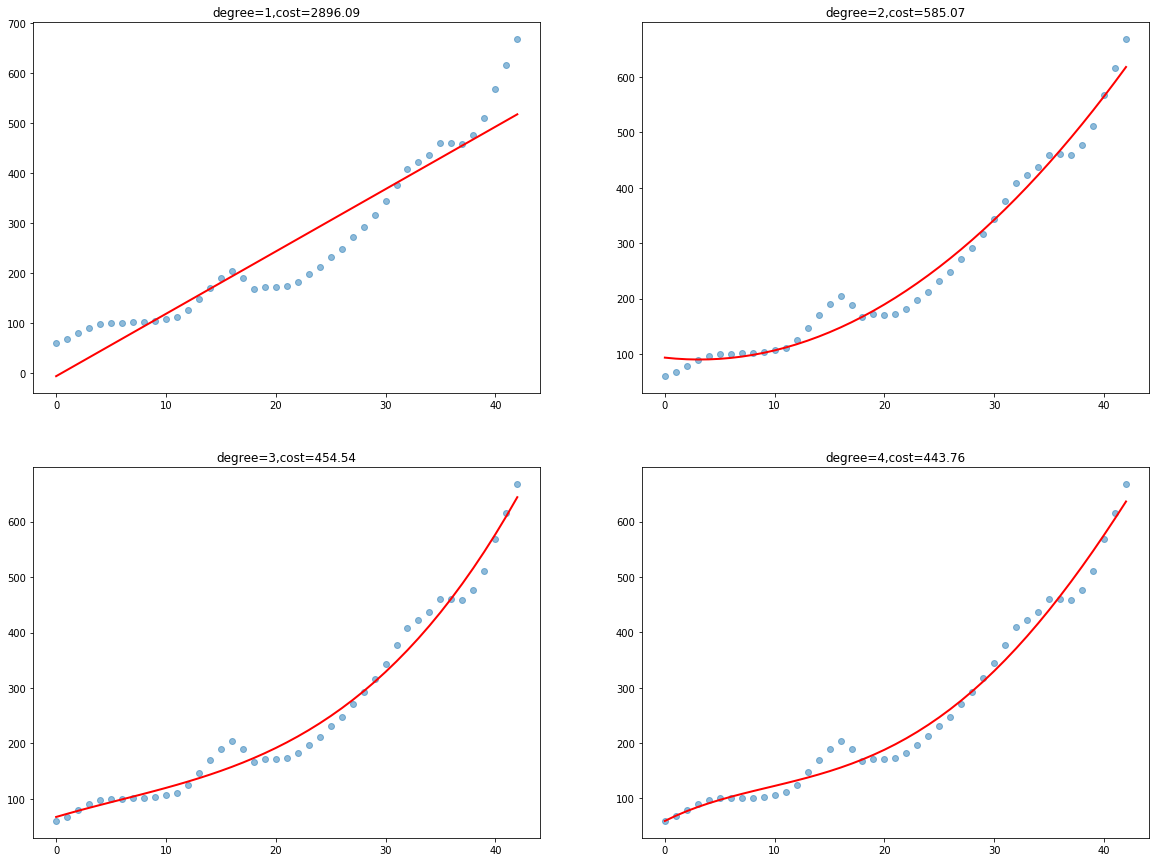

In [7]:
plt.figure(figsize=(20, 15))

for i in range(1,5):
    plt.subplot(2,2, i)
    plt.plot(X, y, 'o', alpha=0.5)
    _,pred_y,cost = fitting(X,y,i)
    plt.plot(X,pred_y, linewidth=2, color='red')
    plt.title("degree={},cost={:.2f}".format(i,cost))

plt.show()
    

We try to use the polynomial regression to fit a polynomial line so that we can achieve a minimum error or minimum Cost Function. The best degree is to simply fit our data on each degree and pick the degree with the best performance. In this case model with degree = 4 is the best fit for our model. since degree=4 has the minimum Cost=443.76 .

## Exe2.Question3. Prediction for Jonas Nordqvist house price in 2022

In [8]:
#test = 2022 normal is 47
test = 47

beta,_,_ = fitting(X,y,4)

predicted = beta[0]+beta[1]*test+beta[2]*(test**2)+beta[3]*(test**3)+beta[4]*(test**4)

In [9]:
predicted

799.3364217385512

Since our model is based on only one feature, It dosen't seems to be realistic prediction. However, Based on conclusion in this research [1] polynomial regression methods were more likely to overfit the training data than linear regression,and it is quite often the case that it is situational of when the right order of polynomial best fits the training data without overfitting. 

## Reference

[1] L. Nunno, “Stock Market Price Prediction Using Linear and Polynomial Regression Models.”